In [1]:
from dasquakes import *
import datetime
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

## Looking at a 4 hour period during the UW-OSU game on November 4th, 2022

In [2]:
cable='seadasn'
record_length = 240 #minutes
t0 = datetime.datetime(2022, 11, 5, 3, 30, 0)

In [3]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

In [4]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 1440000, Number of channels: 4555
Nyquist Frequency: 50.0 Hz, cable length: 29065.238805136032 m


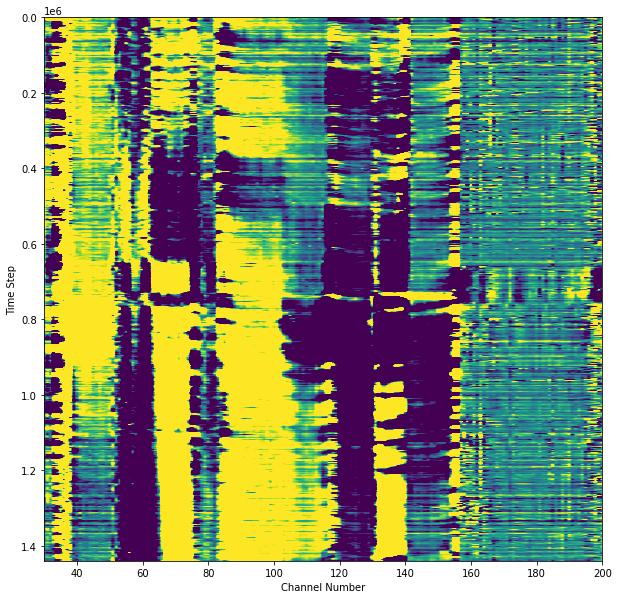

In [5]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.xlim(30,200)
plt.ylabel('Time Step')
plt.show()

In [6]:
# perform a band pass filter

avg = (data[:,0]+data[:,1]+data[:,2]+data[:,3]+data[:,4])/5

[b,a] = butter(2, [1,10], 'bandpass', fs = 100)
data_filt = filtfilt(b,a,avg,axis = 0)

Text(0.5, 1.0, 'Channels 41-81, spaced by 10')

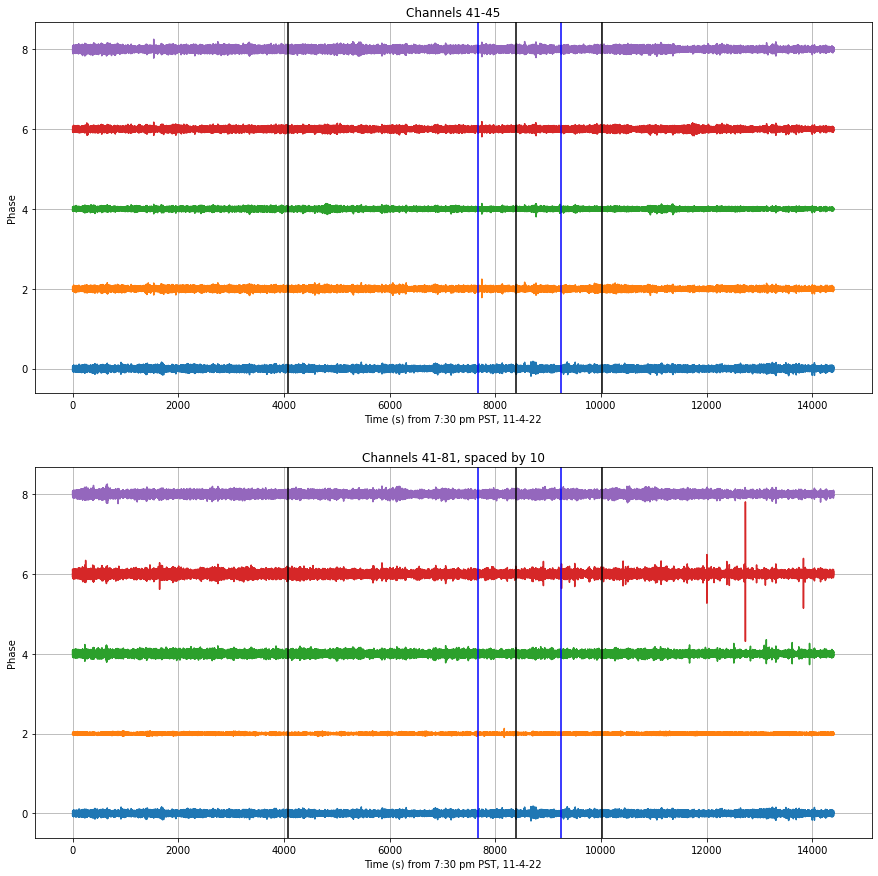

In [7]:
# filter all other data

fig,ax = plt.subplots(2,1,figsize=(15,15))

ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,41],axis=0))
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,42],axis=0)+2)
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,43],axis=0)+4)
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,44],axis=0)+6)
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,45],axis=0)+8)
ax[1].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,41],axis=0))
ax[1].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,51],axis=0)+2)
ax[1].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,61],axis=0)+4)
ax[1].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,71],axis=0)+6)
ax[1].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,81],axis=0)+8)
ax[0].axvline(4080,c='k')
ax[1].axvline(4080,c='k')
ax[0].axvline(7680,c='b')
ax[1].axvline(7680,c='b')
ax[0].axvline(8400,c='k')
ax[1].axvline(8400,c='k')
ax[0].axvline(9240,c='b')
ax[1].axvline(9240,c='b')
ax[0].axvline(10020,c='k')
ax[1].axvline(10020,c='k')
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time (s) from 7:30 pm PST, 11-4-22')
ax[1].set_xlabel('Time (s) from 7:30 pm PST, 11-4-22')
ax[0].set_ylabel('Phase')
ax[1].set_ylabel('Phase')
ax[0].set_title('Channels 41-45')
ax[1].set_title('Channels 41-81, spaced by 10')

#touchdowns are marked in black, sacks are marked in blue

In [8]:
#trying a different frequency domain, zoomed in around first two touchdowns

cable='seadasn'
record_length = 120 #minutes
t0 = datetime.datetime(2022,11, 5, 5, 0, 0)

In [9]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

In [10]:
# perform a high pass filter
[b,a] = butter(2, [.1,1], 'bandpass', fs = 100)

Text(0.5, 1.0, 'Average of Channels')

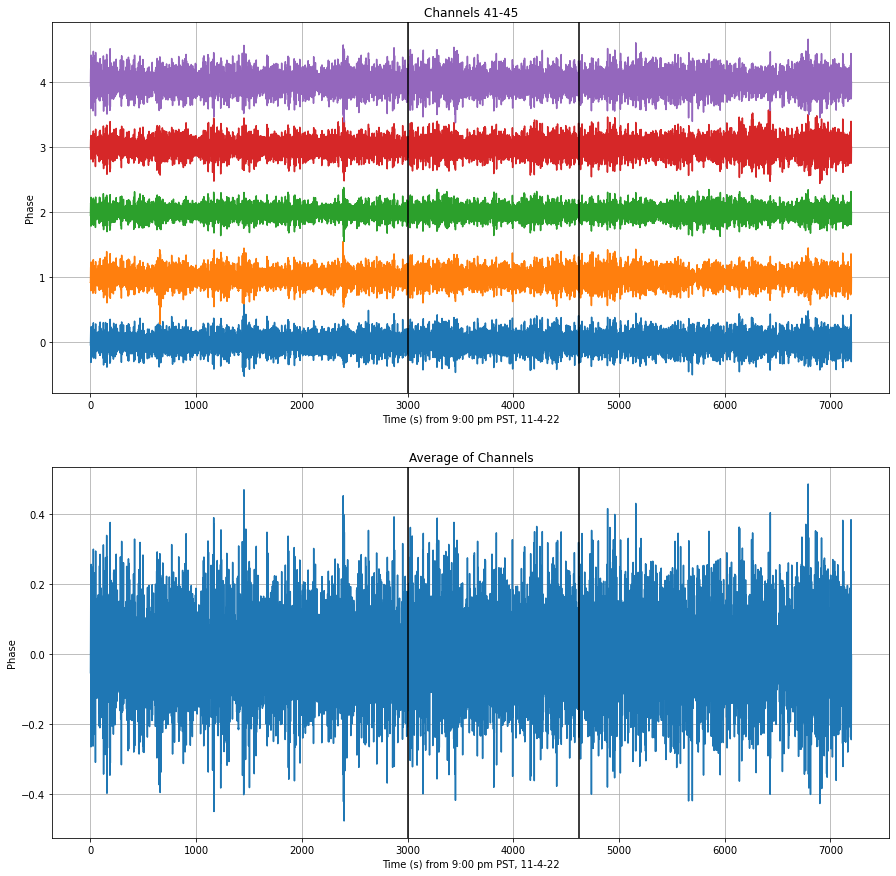

In [11]:
fig,ax = plt.subplots(2,1,figsize=(15,15))

ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,41],axis=0))
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,42],axis=0)+1)
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,43],axis=0)+2)
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,44],axis=0)+3)
ax[0].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,45],axis=0)+4)
ax[1].plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,((data[:,41]+data[:,42]+data[:,43]+data[:,44]+data[:,45])/5),axis=0))
ax[0].axvline(3000,c='k')
ax[0].axvline(4620,c='k')
ax[1].axvline(3000,c='k')
ax[1].axvline(4620,c='k')
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time (s) from 9:00 pm PST, 11-4-22')
ax[1].set_xlabel('Time (s) from 9:00 pm PST, 11-4-22')
ax[0].set_ylabel('Phase')
ax[1].set_ylabel('Phase')
ax[0].set_title('Channels 41-45')
ax[1].set_title('Average of Channels')

## Looking at a possible earthquake? 

In [12]:
cable='seadasn'
record_length = 60 #minutes
t0 = datetime.datetime(2022, 10, 15, 0, 0, 0)

In [13]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

In [14]:
# perform a band pass filter
[b,a] = butter(2, [1,3], 'bandpass', fs = 100)

Text(0.5, 1.0, 'First 5 Channels')

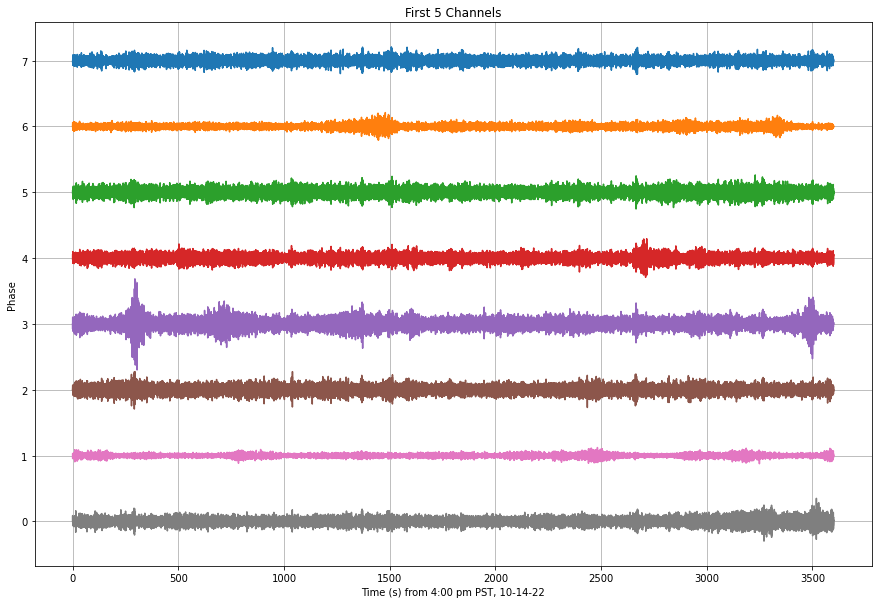

In [16]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,111],axis=0)+7)
ax.plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,101],axis=0)+6)
ax.plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,91],axis=0)+5)
ax.plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,81],axis=0)+4)
ax.plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,71],axis=0)+3)
ax.plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,61],axis=0)+2)
ax.plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,51],axis=0)+1)
ax.plot(np.arange(0,np.shape(data)[0]/100,1/100), filtfilt(b,a,data[:,41],axis=0))
ax.grid()
ax.set_xlabel('Time (s) from 4:00 pm PST, 10-14-22')
ax.set_ylabel('Phase')
ax.set_title('First 5 Channels')

## Conclusions

Although there were no signals seen in the data, there are still some conclusions we can draw from this study. The fact that no signal can be seen from Husky Stadium implies that there might be some sort of seismic barrier between the stadium and the cable, since similarly sized crowds have been recorded to make seismic signals. Comparing this to the well documented BeastQuake, we can see some significant differences. Looking at the surrounding lithology, we see that in the case of the BeastQuake, both the stadium and the seismometer were located on fill, while in the case of Husky stadium, only the stadium is built on fill; the cable lies on solid rock. There are also differences in the shapes of the stadiums, which may change how sound waves propagate. This also might be a consequence of some other limitation, such as ambient noise or limitations in the instrumentation. 